 Равномерное распределение  $X_{i} \sim  U[0, \theta]$


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import numpy as np
import math
%matplotlib inline

Цвета для наших оценок на графике

This is for $\color{red}{2 * \bar{X}}$

This is for $\color{green}{\bar{X} + X_{(n)} / 2}$

This is for $\color{blue}{(n + 1) * X_{(1)}}$

This is for $\color{brown}{X_{(1)} + X_{(n)}}$

This is for $\color{magenta}{(n + 1) / n * X_{(n)}}$

$$f(\theta^*, \theta) = |\theta^* - \theta|$$

In [3]:
def f(x, y) :
    return abs(x - y)

Создадим лист из цветов и лэйблов к графикам

In [4]:
color = ['red', 'green', 'blue', 'brown', 'magenta']
elems = ['$2 \cdot \overline{X}$',\
         '$\overline{X} + \\frac{X_{(n)}}{2}$' ,\
         '$(n + 1) \cdot X_{(1)}$' ,\
         '$X_{(1)} + X_{(n)}$' ,\
         '$\\frac{(n + 1)}{n} \cdot X_{(n)}$']

Эта функция принимает на вход параметр равномерного распределения $\theta$ , количество элементов, а также пределы по оси OY, также есть булевский параметр is_good, он отвечает за то, рисовать $(n + 1) \cdot X_{(1)}$ или нет

Генерирует выборку, считает оценки, и далее, выдает нам график, на котором изображены |$\theta^* -\theta$| для каждой из оценок

In [63]:
def uniform_distribution_generator(theta, elements_number, ylimit = 2, is_good = True) :
    selection = scipy.stats.uniform.rvs(loc = 0, scale = theta, size = elements_number)
    evals = np.zeros((elements_number, 5))
    means = [np.mean(selection[elements_number - i - 1:]) for i in xrange(elements_number)]
    maxes = [max(selection[elements_number - i - 1:]) for i in xrange(elements_number)]
    mines = [min(selection[elements_number - i - 1:]) for i in xrange(elements_number)]
    evals[:,0] = map(lambda x: 2 * x, means)
    evals[:,1] = [means[i] +  maxes[i] / 2. for i in xrange(elements_number)]
    evals[:,2] = [(i + 2) * mines[i] for i in xrange(elements_number)]
    evals[:,3] = [maxes[i] + mines[i] for i in xrange(elements_number)]
    evals[:,4] = [maxes[i] * ((i + 2.) / (i + 1.) ) for i in xrange(elements_number)]
    
    dots = [i for i in xrange(elements_number)]
    plt.figure(figsize=(15, 5))
    for j in range(5):
        if j != 2 or (j == 2 and is_good) :
            plot = plt.plot(dots, [f(evals[i, j], theta) for i in dots], color = color[j], label = elems[j])
        plt.ylim(0,ylimit)
        plt.xlabel('Number of elements')
        plt.ylabel('|$\\theta^* - \\theta$|')
        plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=1.5)
    plt.title('Uniform distribution $U[0, \\theta]$ where $\\theta$ = ' + str(theta))


    plt.show()



# Построим графики
Не забываем, что все оценки, кроме $(n + 1) \cdot X_{(1)}$ являются сильносостоятельными, а эта даже состоятельной не является. Графики помогут убедиться нам в этом

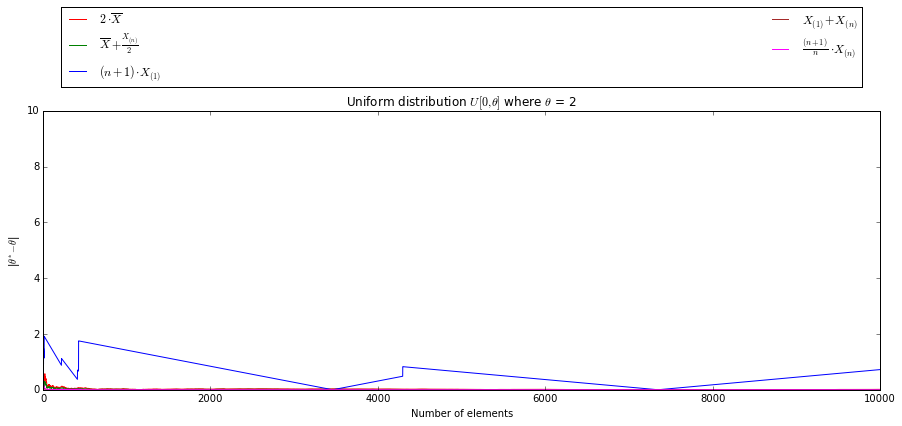

In [64]:
uniform_distribution_generator(2, 10 ** 4, 10)

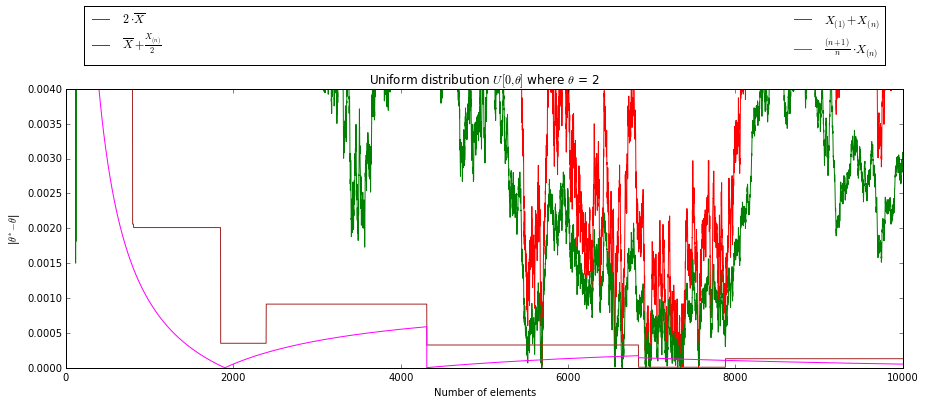

In [65]:
uniform_distribution_generator(2, 10 ** 4, 0.004, is_good = False)

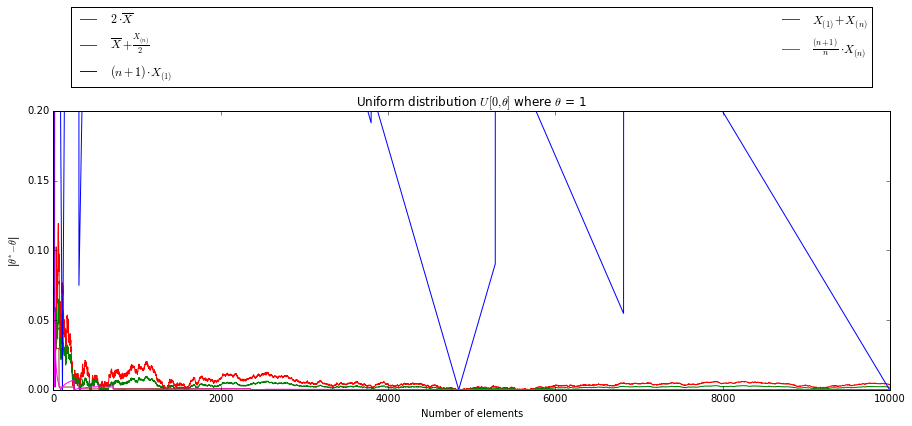

In [67]:
uniform_distribution_generator(1, 10 ** 4, 0.2)

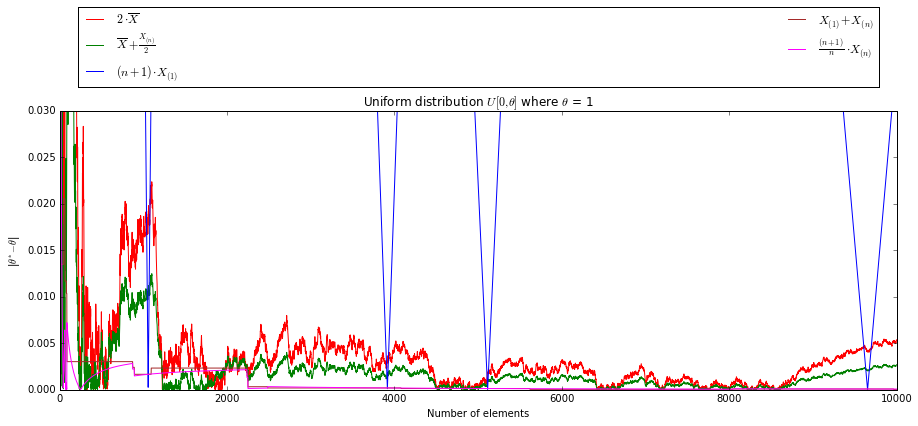

In [68]:
uniform_distribution_generator(1, 10 ** 4, 0.03)

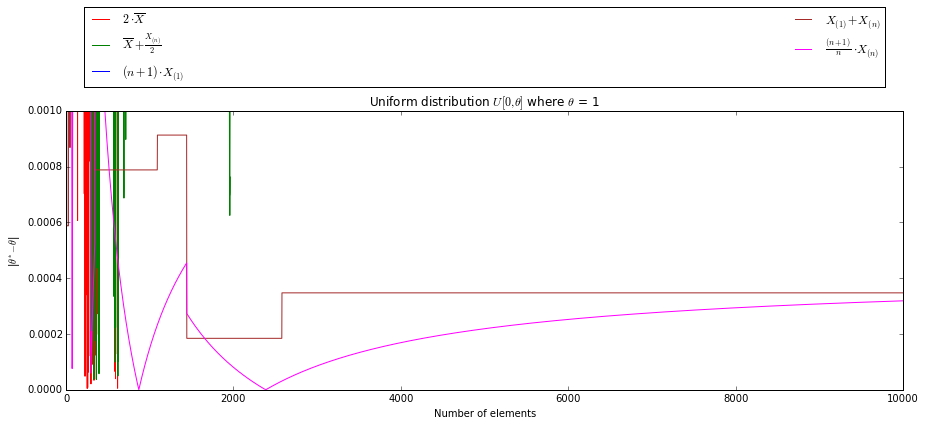

In [69]:
uniform_distribution_generator(1, 10 ** 4, 0.001)

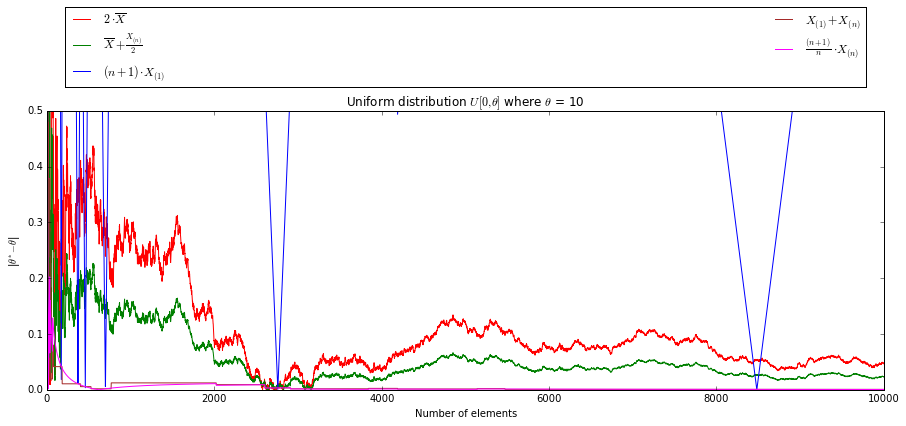

In [70]:
uniform_distribution_generator(10, 10 ** 4, 0.5)

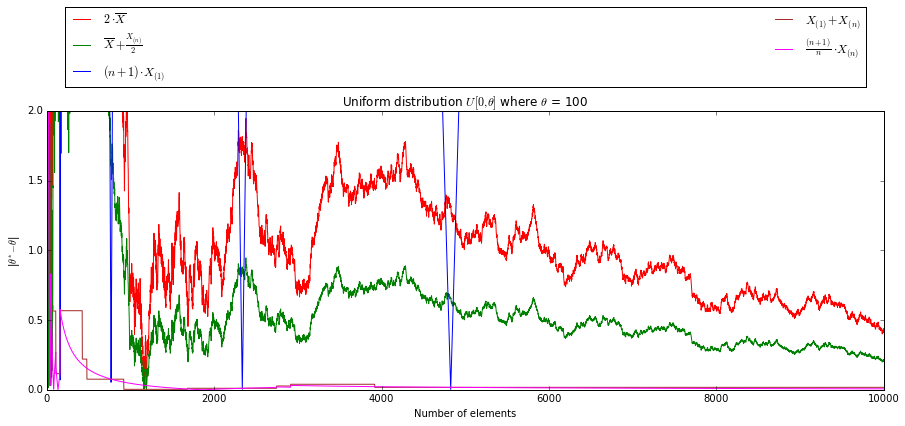

In [71]:
uniform_distribution_generator(100, 10 ** 4)

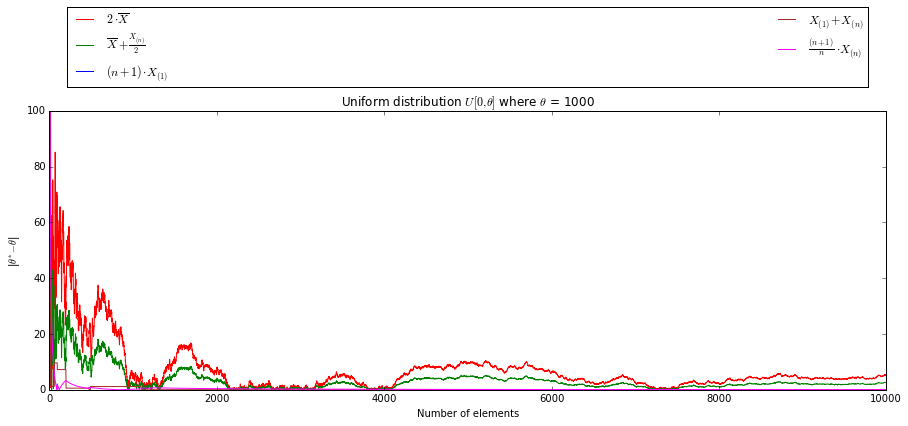

In [72]:
uniform_distribution_generator(1000, 10 ** 4, 100)

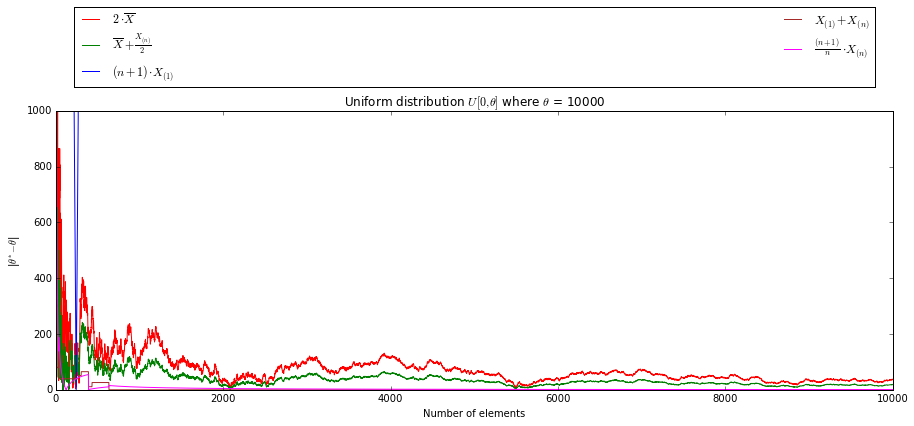

In [73]:
uniform_distribution_generator(10000, 10 ** 4, 1000)

# Итог
Можно заметить, что как раз все, кроме $(n + 1) \cdot X_{(1)}$  $\to$ 0 при n $\to$ +$\infty$
Т.е. видно , что они состоятельные, но все-таки лучше всего себя ведут оценки $\color{brown}{X_{(1)} + X_{(n)}}$ и $\color{magenta}{(n + 1) / n * X_{(n)}}$